# 1. Project Overview
## The objective of this project was to develop a robust machine learning model to predict vomitoxin_ppb concentration in corn samples based on spectral data. The dataset consisted of 450+ features representing spectral reflectance values.

- Key steps included:
    -  Data Cleaning and Preprocessing
    -  Exploratory Data Analysis (EDA)
    -  Model Development and Optimization
    -  Model Evaluation using Key Metrics

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
df = pd.read_csv('MLE-Assignment.csv')

In [71]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
...,...,...,...,...,...,...,...,...
444,500.0,0.738738,0.053601,0.571767,0.700638,0.743965,0.775686,0.945225
445,500.0,0.738298,0.054014,0.577803,0.698655,0.743301,0.775621,0.932812
446,500.0,0.737599,0.054136,0.576985,0.698107,0.745216,0.774635,0.931381
447,500.0,0.738099,0.054297,0.562302,0.699673,0.745733,0.774310,0.957860


In [75]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

# 2. Data Cleaning and Preprocessing
### 2.1 Data Loading and Initial Inspection
- The dataset was loaded and inspected for missing values, outliers, and inconsistencies. The hsi_id column, being a string identifier, was removed since it held no predictive value.

### 2.2 Handling Missing Data
- No significant missing data was identified.
- StandardScaler was applied to normalize the data after preprocessing.

### 2.3 Outlier Detection and Treatment
- Outliers were identified using boxplots and the IQR method.
- Features with extreme skewness were transformed using log transformation to improve data distribution.

### 2.4 Data Splitting and Scaling
- Data was split into 80% training and 20% testing sets.
- The StandardScaler was applied to ensure uniform feature scaling for optimal model performance.

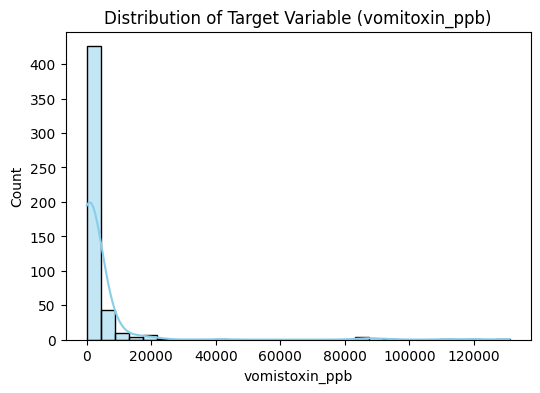

In [76]:
#histogram
plt.figure(figsize = (6,4))
sns.histplot(df['vomitoxin_ppb'], kde = True, bins = 30, color = 'skyblue')
plt.title('Distribution of Target Variable (vomitoxin_ppb)')
plt.xlabel('vomistoxin_ppb')
plt.show()# 2. Data Cleaning and Preprocessing
### 2.1 Data Loading and Initial Inspection
- The dataset was loaded and inspected for missing values, outliers, and inconsistencies. The hsi_id column, being a string identifier, was removed since it held no predictive value.

### 2.2 Handling Missing Data
- No significant missing data was identified.
- StandardScaler was applied to normalize the data after preprocessing.

### 2.3 Outlier Detection and Treatment
- Outliers were identified using boxplots and the IQR method.
- Features with extreme skewness were transformed using log transformation to improve data distribution.

### 2.4 Data Splitting and Scaling
- Data was split into 80% training and 20% testing sets.
- The StandardScaler was applied to ensure uniform feature scaling for optimal model performance.

<AxesSubplot: >

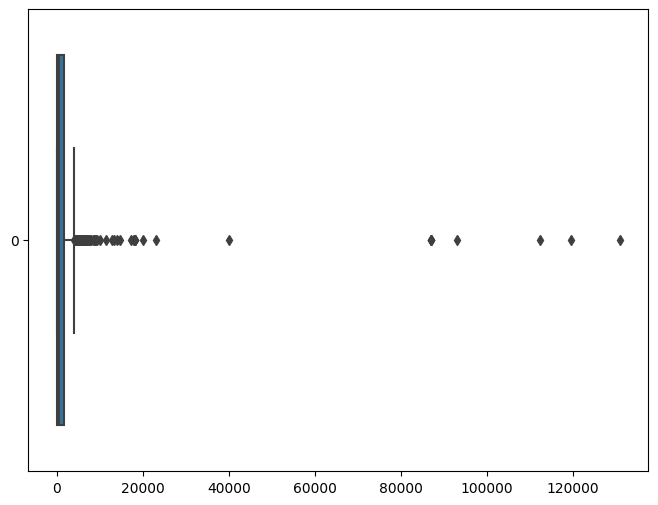

In [77]:
plt.figure(figsize= (8,6))
sns.boxplot(df['vomitoxin_ppb'], orient= 'h')

In [79]:
# checking skeweness of the data as implied by looking at the histogram above.

from scipy.stats import skew

# Skewness calculation
skewness_value = skew(df['vomitoxin_ppb'].dropna())  # Drop NaN to avoid errors
print(f'Skewness Value: {skewness_value:.2f}')


Skewness Value: 7.20


In [80]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for all numerical features
skewed_features = df[numerical_cols].skew().sort_values(ascending=False)

# Filter features with skewness > ±1
highly_skewed = skewed_features[abs(skewed_features) > 1]
print(f"Highly Skewed Features (Total: {len(highly_skewed)}):")
print(highly_skewed)

Highly Skewed Features (Total: 1):
vomitoxin_ppb    7.225181
dtype: float64


- **Target variable is Highly Skewed**

In [81]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.columns[1:-1]:  # Exclude 'hsi_id' and target column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Count outliers
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        outlier_counts[col] = len(outliers)

    return {k: v for k, v in outlier_counts.items() if v > 0}  # Return only columns with outliers

# Detect outliers in the dataset
outliers_found = detect_outliers_iqr(df)

# Print features with detected outliers
print("\nColumns with Outliers and Their Count:")
for feature, count in outliers_found.items():
    print(f"{feature}: {count} outliers")



Columns with Outliers and Their Count:
15: 2 outliers
17: 2 outliers
19: 2 outliers
20: 1 outliers
21: 1 outliers
23: 1 outliers
24: 2 outliers
25: 1 outliers
27: 1 outliers
28: 2 outliers
30: 1 outliers
31: 1 outliers
32: 2 outliers
33: 1 outliers
34: 4 outliers
35: 4 outliers
36: 3 outliers
37: 3 outliers
38: 4 outliers
39: 5 outliers
40: 2 outliers
41: 5 outliers
42: 6 outliers
43: 6 outliers
44: 4 outliers
45: 4 outliers
46: 4 outliers
47: 6 outliers
48: 4 outliers
49: 7 outliers
50: 4 outliers
51: 4 outliers
52: 3 outliers
53: 3 outliers
54: 3 outliers
55: 4 outliers
56: 1 outliers
57: 3 outliers
58: 3 outliers
59: 5 outliers
60: 3 outliers
61: 8 outliers
62: 6 outliers
63: 5 outliers
64: 5 outliers
65: 4 outliers
66: 2 outliers
67: 4 outliers
68: 4 outliers
69: 3 outliers
70: 5 outliers
71: 2 outliers
72: 2 outliers
73: 5 outliers
74: 3 outliers
75: 4 outliers
76: 9 outliers
77: 4 outliers
78: 2 outliers
79: 6 outliers
80: 4 outliers
81: 4 outliers
82: 4 outliers
83: 6 outliers


- The target variable is right skewed as shown in both histogram and calculation.
- I have used Log transformation , which is best suitable for right skewed data.

In [82]:
# 1. Log Transformation
df['vomitoxin_ppb_log'] = np.log1p(df['vomitoxin_ppb'])

In [83]:
# 3. Outlier Removal Using IQR.
Q1 = df['vomitoxin_ppb_log'].quantile(0.25)
Q3 = df['vomitoxin_ppb_log'].quantile(0.75)
IQR = Q3 - Q1

# Removing values below Q1 - 1.5*IQR and above Q3 + 1.5*IQR
df_cleaned = df[(df['vomitoxin_ppb_log'] >= Q1 - 1.5 * IQR) & 
                 (df['vomitoxin_ppb_log'] <= Q3 + 1.5 * IQR)]

In [84]:
print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

Original Data Shape: (500, 451)
Cleaned Data Shape: (404, 451)


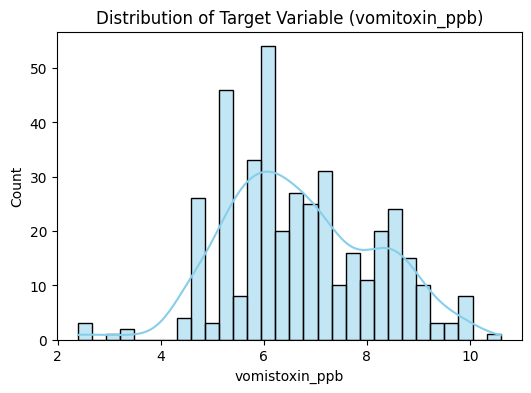

In [85]:
#histogram
plt.figure(figsize = (6,4))
sns.histplot(df_cleaned['vomitoxin_ppb_log'], kde = True, bins = 30, color = 'skyblue')
plt.title('Distribution of Target Variable (vomitoxin_ppb)')
plt.xlabel('vomistoxin_ppb')
plt.show()

- The Graph shows :
    - Reduced Skewness:
    - The original target variable was heavily skewed, which could have misled the model by placing too much importance on extreme values.     
    - Now the distribution appears more symmetric, reducing potential bias.
    - Outlier Management: Removing extreme outliers reduces noise, making the model more stable and generalizable.

In [86]:
# Checking for missing values
missing_data = df_cleaned.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

# Display columns with missing values
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print(missing_info[missing_info['Missing Values'] > 0])


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


**No Missing Values!**

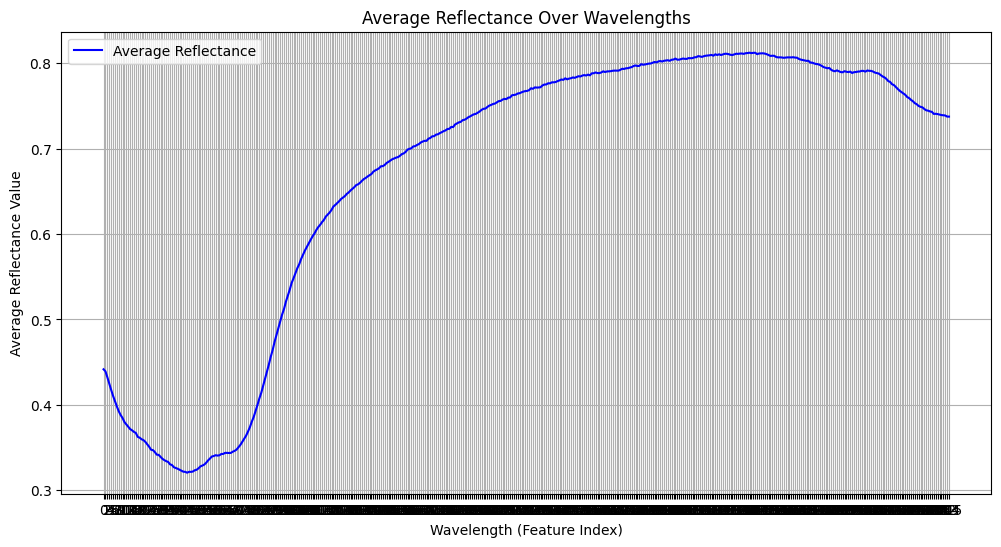

In [87]:
spectral_cols = df_cleaned.columns[1:447]  

# Calculate average reflectance for each wavelength
avg_reflectance = df_cleaned[spectral_cols].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(spectral_cols, avg_reflectance, label='Average Reflectance', color='blue')
plt.title('Average Reflectance Over Wavelengths')
plt.xlabel('Wavelength (Feature Index)')
plt.ylabel('Average Reflectance Value')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
df_cleaned.drop('vomitoxin_ppb', axis=1, inplace=True)
df_cleaned.head()

C:\Users\Hamish\AppData\Local\Temp\ipykernel_13948\1450609786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('vomitoxin_ppb', axis=1, inplace=True)


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb_log
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,7.003974
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,6.908755
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,7.170888
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,7.170888
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,5.398163


In [89]:
df_cleaned.drop('hsi_id', axis=1, inplace=True)  # Dropping string column 'hsi_id'

C:\Users\Hamish\AppData\Local\Temp\ipykernel_13948\4008384390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('hsi_id', axis=1, inplace=True)  # Dropping string column 'hsi_id'


In [90]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb_log
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,7.003974
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,6.908755
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,7.170888
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,7.170888
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,5.398163


# 3. Model Development and Optimization
### 3.1 Baseline Model — Neural Network
- A Neural Network model was implemented with three hidden layers and ReLU activation.
- Despite tuning, the model yielded unsatisfactory results:
    - MAE: 1.2105
    - RMSE: 1.5128
     -R² Score: -0.0761

### 4.2 Switching to XGBoost
- Considering the dataset's tabular structure, XGBoost was selected due to its strong performance on structured data. The initial model produced improved results:
    - MAE: 0.9429
    - RMSE: 1.2273
    - R² Score: 0.2888

### 4.3 Hyperparameter Optimization Using Optuna
- To further enhance the model's performance, Optuna was employed for efficient hyperparameter tuning. The following parameters were optimized:

   - n_estimators: Number of trees
   - max_depth: Tree depth for complexity control
   - learning_rate: Step size for weight updates
   - subsample: Fraction of data samples per tree
   - colsample_bytree: Fraction of features sampled for each tree
   - The tuned XGBoost model achieved the following results:

    - MAE: 0.8313
    - RMSE: 1.1047
    - R² Score: 0.4238
    
#### This substantial improvement demonstrates the effectiveness of hyperparameter tuning.

In [91]:
# Features and Target
X = df_cleaned.drop('vomitoxin_ppb_log', axis=1)
y = df_cleaned['vomitoxin_ppb_log']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

In [94]:
model = keras.models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [95]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               loss='mean_squared_error', 
               metrics=['mae'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [97]:
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stop])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 25.5341 - mae: 4.4484 - val_loss: 19.4736 - val_mae: 3.6348
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.0850 - mae: 3.2532 - val_loss: 19.0826 - val_mae: 3.8943
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9789 - mae: 3.1831 - val_loss: 15.6797 - val_mae: 3.4984
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1792 - mae: 2.9535 - val_loss: 15.2517 - val_mae: 3.4723
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.3675 - mae: 3.0512 - val_loss: 13.2466 - val_mae: 3.2424
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.4533 - mae: 2.6038 - val_loss: 11.5620 - val_mae: 2.9177
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7374 - mae: 2.5778 - val_loss: 10.4153 - val_mae: 2.7441
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7139 - mae: 2.4443 - val_loss: 9.3716 - val_mae: 2.6252
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.92

In [98]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [99]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.2104628746118047
Root Mean Squared Error (RMSE): 1.5128226285316457
R² Score: -0.08063521596450873


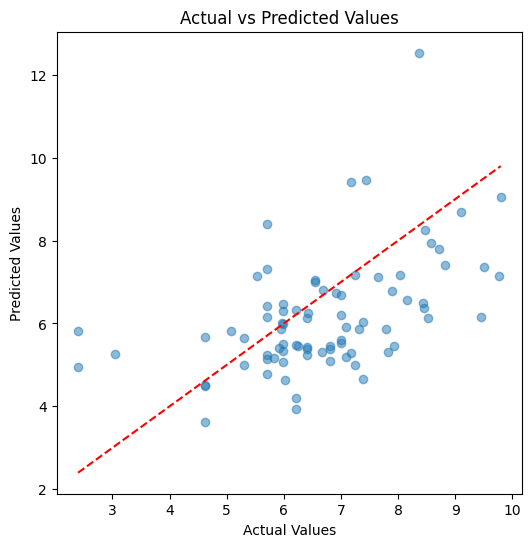

In [100]:
# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Model Optimisation.
- Finding the ideal Parameters using Optuna
- Done tuning of Hyperparameters.

In [104]:
import optuna

C:\Users\Hamish\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [105]:
def objective(trial):
    # Tuning Hyperparameters
    n_layers = trial.suggest_int('n_layers', 2, 4)      # 2 to 4 hidden layers
    n_neurons = trial.suggest_int('n_neurons', 32, 256) # 32 to 256 neurons per layer
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)  # Learning rate
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)  # Dropout range
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])  # Batch size

    # Model Architecture
    model = keras.models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    for _ in range(n_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1))  # Output layer

    # Compile the Model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='mean_squared_error')

    # EarlyStopping for stability
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the Model
    history = model.fit(X_train_scaled, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=batch_size,
                        callbacks=[early_stop],
                        verbose=0)

    # Evaluate Model
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

In [106]:
study = optuna.create_study(direction='minimize')  # Minimize MAE

# Optimize for 50 Trials
study.optimize(objective, n_trials=50)

# Best Parameters
print("Best Hyperparameters:", study.best_params)
print("Best MAE:", study.best_value)

[I 2025-03-16 22:25:46,647] A new study created in memory with name: no-name-d86b5afb-dd43-4cd4-b95b-88f298ff03da


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F8471A80D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-03-16 22:26:00,953] Trial 0 finished with value: 2.833824843137524 and parameters: {'n_layers': 4, 'n_neurons': 159, 'learning_rate': 2.6926592427135553e-05, 'dropout_rate': 0.30318791112039944, 'batch_size': 32}. Best is trial 0 with value: 2.833824843137524.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[I 2025-03-16 22:26:13,365] Trial 1 finished with value: 3.0397214264060732 and parameters: {'n_layers': 3, 'n_neurons': 239, 'learning_rate': 1.1092935517296554e-05, 'dropout_rate': 0.11722234442227597, 'batch_size': 32}. Best is trial 0 with value: 2.833824843137524.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-16 22:26:19,359] Trial 2 finished with value: 2.0957437729461863 and parameters: {'n_layers': 3, 'n_neurons': 126, 'learning_rate': 0.00031909362072154703, 'dropout_rate': 0.45285296920677987, 'batch_size': 32}. Best is trial 2 with value: 2.0957437729461863.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[I 2025-03-16 22:26:30,195] Trial 3 finished with value: 1.8145089454526764 and parameters: {'n_layers': 3, 'n_neurons': 176, 'learning_rate': 7.297534019229511e-05, 'dropout_rate': 0.4151920969931385, 'batch_size': 16}. Best is trial 3 with value: 1.8145089454526764.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:26:38,492] Trial 4 finished with value: 3.6189043261490554 and parameters: {'n_layers': 2, 'n_neurons': 45, 'learning_rate': 6.0174561139007503e-05, 'dropout_rate': 0.36788711702020416, 'batch_size': 64}. Best is trial 3 with value: 1.8145089454526764.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-16 22:26:43,101] Trial 5 finished with value: 2.6843457900075887 and parameters: {'n_layers': 4, 'n_neurons': 199, 'learning_rate': 0.0005570522101546086, 'dropout_rate': 0.42868804078118783, 'batch_size': 64}. Best is trial 3 with value: 1.8145089454526764.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-16 22:26:51,517] Trial 6 finished with value: 3.7719771500967805 and parameters: {'n_layers': 2, 'n_neurons': 55, 'learning_rate': 1.82138751095224e-05, 'dropout_rate': 0.4961625395806024, 'batch_size': 64}. Best is trial 3 with value: 1.8145089454526764.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[I 2025-03-16 22:27:03,847] Trial 7 finished with value: 1.3819771170888695 and parameters: {'n_layers': 3, 'n_neurons': 154, 'learning_rate': 0.00013650425284738736, 'dropout_rate': 0.4152060292762819, 'batch_size': 16}. Best is trial 7 with value: 1.3819771170888695.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-16 22:27:19,681] Trial 8 finished with value: 2.5168180197372876 and parameters: {'n_layers': 4, 'n_neurons': 195, 'learning_rate': 2.84427154492634e-05, 'dropout_rate': 0.4026983796346214, 'batch_size': 16}. Best is trial 7 with value: 1.3819771170888695.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-16 22:27:29,409] Trial 9 finished with value: 3.498405700542211 and parameters: {'n_layers': 3, 'n_neurons': 228, 'learning_rate': 1.2701062088739604e-05, 'dropout_rate': 0.20894801494602808, 'batch_size': 64}. Best is trial 7 with value: 1.3819771170888695.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-16 22:27:38,966] Trial 10 finished with value: 1.449640484720444 and parameters: {'n_layers': 2, 'n_neurons': 106, 'learning_rate': 0.00017832887497220475, 'dropout_rate': 0.31838631148319396, 'batch_size': 16}. Best is trial 7 with value: 1.3819771170888695.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-16 22:27:47,832] Trial 11 finished with value: 1.3765475263125577 and parameters: {'n_layers': 2, 'n_neurons': 108, 'learning_rate': 0.0001893710929354705, 'dropout_rate': 0.3209613949597479, 'batch_size': 16}. Best is trial 11 with value: 1.3765475263125577.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:27:55,997] Trial 12 finished with value: 1.3428292434089726 and parameters: {'n_layers': 2, 'n_neurons': 81, 'learning_rate': 0.00020619921453743722, 'dropout_rate': 0.19499432981152723, 'batch_size': 16}. Best is trial 12 with value: 1.3428292434089726.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-16 22:28:05,963] Trial 13 finished with value: 1.1222117233881204 and parameters: {'n_layers': 2, 'n_neurons': 96, 'learning_rate': 0.0009357750302150972, 'dropout_rate': 0.21133276548294405, 'batch_size': 16}. Best is trial 13 with value: 1.1222117233881204.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-16 22:28:11,750] Trial 14 finished with value: 1.297495135005978 and parameters: {'n_layers': 2, 'n_neurons': 62, 'learning_rate': 0.000991387376967908, 'dropout_rate': 0.21159582918042932, 'batch_size': 16}. Best is trial 13 with value: 1.1222117233881204.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-16 22:28:16,653] Trial 15 finished with value: 1.5110739429337439 and parameters: {'n_layers': 2, 'n_neurons': 74, 'learning_rate': 0.0009870433547362718, 'dropout_rate': 0.23380616807908597, 'batch_size': 16}. Best is trial 13 with value: 1.1222117233881204.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-16 22:28:25,612] Trial 16 finished with value: 1.1847903138330829 and parameters: {'n_layers': 2, 'n_neurons': 82, 'learning_rate': 0.0008420415347657151, 'dropout_rate': 0.13765565113340728, 'batch_size': 16}. Best is trial 13 with value: 1.1222117233881204.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-16 22:28:34,266] Trial 17 finished with value: 1.2598113511716045 and parameters: {'n_layers': 2, 'n_neurons': 96, 'learning_rate': 0.0004459386947640691, 'dropout_rate': 0.11255409702799309, 'batch_size': 16}. Best is trial 13 with value: 1.1222117233881204.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-16 22:28:42,080] Trial 18 finished with value: 1.1107641135823396 and parameters: {'n_layers': 2, 'n_neurons': 32, 'learning_rate': 0.0006143774070788214, 'dropout_rate': 0.15797403537532662, 'batch_size': 16}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-16 22:28:48,776] Trial 19 finished with value: 2.2175478582538273 and parameters: {'n_layers': 3, 'n_neurons': 32, 'learning_rate': 0.00035818388007820203, 'dropout_rate': 0.2583852872756549, 'batch_size': 32}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-16 22:28:57,256] Trial 20 finished with value: 1.1723844631701978 and parameters: {'n_layers': 3, 'n_neurons': 131, 'learning_rate': 0.0005592894598820061, 'dropout_rate': 0.16490551773645687, 'batch_size': 16}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-16 22:29:04,343] Trial 21 finished with value: 1.2184010643920171 and parameters: {'n_layers': 3, 'n_neurons': 129, 'learning_rate': 0.0006275341203995494, 'dropout_rate': 0.16302890664383204, 'batch_size': 16}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-16 22:29:15,375] Trial 22 finished with value: 1.24324180448211 and parameters: {'n_layers': 2, 'n_neurons': 133, 'learning_rate': 0.0002833493462106406, 'dropout_rate': 0.16719581500885888, 'batch_size': 16}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-16 22:29:24,539] Trial 23 finished with value: 1.2439880315218002 and parameters: {'n_layers': 3, 'n_neurons': 33, 'learning_rate': 0.0005328103938957049, 'dropout_rate': 0.25818317217413517, 'batch_size': 16}. Best is trial 18 with value: 1.1107641135823396.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-16 22:29:32,993] Trial 24 finished with value: 0.9345219411323851 and parameters: {'n_layers': 4, 'n_neurons': 119, 'learning_rate': 0.0007292305395035312, 'dropout_rate': 0.16313017864127682, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-16 22:29:42,313] Trial 25 finished with value: 1.0247358189349667 and parameters: {'n_layers': 4, 'n_neurons': 100, 'learning_rate': 0.0007359339757371403, 'dropout_rate': 0.2597598924171859, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


[I 2025-03-16 22:29:52,884] Trial 26 finished with value: 1.3423828574951078 and parameters: {'n_layers': 4, 'n_neurons': 111, 'learning_rate': 0.000257992576422372, 'dropout_rate': 0.2602133303690131, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-16 22:29:59,966] Trial 27 finished with value: 1.6410355812975737 and parameters: {'n_layers': 4, 'n_neurons': 149, 'learning_rate': 0.00039113619603203055, 'dropout_rate': 0.35969156687931353, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-16 22:30:04,648] Trial 28 finished with value: 1.3809961540706275 and parameters: {'n_layers': 4, 'n_neurons': 66, 'learning_rate': 0.0006971094050818171, 'dropout_rate': 0.14573845559745888, 'batch_size': 32}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-16 22:30:10,630] Trial 29 finished with value: 2.3954072808533344 and parameters: {'n_layers': 4, 'n_neurons': 166, 'learning_rate': 0.00010881334950122262, 'dropout_rate': 0.28745420932445115, 'batch_size': 64}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-16 22:30:18,075] Trial 30 finished with value: 2.6801590674457874 and parameters: {'n_layers': 4, 'n_neurons': 95, 'learning_rate': 3.880162630804197e-05, 'dropout_rate': 0.17540998309503023, 'batch_size': 32}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-16 22:30:22,261] Trial 31 finished with value: 1.4153472493882322 and parameters: {'n_layers': 4, 'n_neurons': 117, 'learning_rate': 0.0007483782278397972, 'dropout_rate': 0.22388291425281323, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:30:28,284] Trial 32 finished with value: 1.1775972883406627 and parameters: {'n_layers': 4, 'n_neurons': 92, 'learning_rate': 0.00044046492336334775, 'dropout_rate': 0.1927072784132785, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-16 22:30:34,890] Trial 33 finished with value: 1.1191424276657298 and parameters: {'n_layers': 4, 'n_neurons': 141, 'learning_rate': 0.0007556801476247324, 'dropout_rate': 0.10193518135666671, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-16 22:30:41,468] Trial 34 finished with value: 1.1389414539418579 and parameters: {'n_layers': 4, 'n_neurons': 177, 'learning_rate': 0.000698108511974113, 'dropout_rate': 0.13016204995122244, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:30:47,901] Trial 35 finished with value: 1.3356561741242938 and parameters: {'n_layers': 4, 'n_neurons': 143, 'learning_rate': 0.0003038472312985902, 'dropout_rate': 0.10438673343352607, 'batch_size': 32}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:30:53,788] Trial 36 finished with value: 1.207985457063757 and parameters: {'n_layers': 4, 'n_neurons': 140, 'learning_rate': 0.000496961872706803, 'dropout_rate': 0.10380583399990545, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-16 22:30:58,751] Trial 37 finished with value: 1.5360248004955628 and parameters: {'n_layers': 4, 'n_neurons': 165, 'learning_rate': 0.0006888577654334236, 'dropout_rate': 0.14419571090142705, 'batch_size': 64}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-16 22:31:04,842] Trial 38 finished with value: 1.3745989196039967 and parameters: {'n_layers': 3, 'n_neurons': 185, 'learning_rate': 0.0002412695050610674, 'dropout_rate': 0.1267261508360787, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-16 22:31:13,712] Trial 39 finished with value: 1.5338605560603804 and parameters: {'n_layers': 4, 'n_neurons': 119, 'learning_rate': 6.366412235410979e-05, 'dropout_rate': 0.18440000441790708, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-16 22:31:21,404] Trial 40 finished with value: 1.4107440320324631 and parameters: {'n_layers': 3, 'n_neurons': 215, 'learning_rate': 0.00014254254906512155, 'dropout_rate': 0.28918061626663216, 'batch_size': 32}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-16 22:31:28,282] Trial 41 finished with value: 0.9883222873350198 and parameters: {'n_layers': 4, 'n_neurons': 254, 'learning_rate': 0.000882741210113574, 'dropout_rate': 0.24219814005293608, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-16 22:31:35,385] Trial 42 finished with value: 1.1507275744233503 and parameters: {'n_layers': 4, 'n_neurons': 53, 'learning_rate': 0.0008107690818148564, 'dropout_rate': 0.24413857556765903, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-16 22:31:42,512] Trial 43 finished with value: 1.4005866459420333 and parameters: {'n_layers': 4, 'n_neurons': 241, 'learning_rate': 0.000623987111126553, 'dropout_rate': 0.33993260055958957, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-16 22:31:47,656] Trial 44 finished with value: 1.9012695314276427 and parameters: {'n_layers': 4, 'n_neurons': 254, 'learning_rate': 0.0003757821877519665, 'dropout_rate': 0.27811834155754445, 'batch_size': 64}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-16 22:31:52,085] Trial 45 finished with value: 1.3780271182836932 and parameters: {'n_layers': 4, 'n_neurons': 161, 'learning_rate': 0.0004952170818010317, 'dropout_rate': 0.16205600229049305, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-16 22:31:59,922] Trial 46 finished with value: 1.0478698229481642 and parameters: {'n_layers': 4, 'n_neurons': 120, 'learning_rate': 0.0008299320036446287, 'dropout_rate': 0.3057434047527842, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-16 22:32:07,706] Trial 47 finished with value: 1.134176209057206 and parameters: {'n_layers': 3, 'n_neurons': 44, 'learning_rate': 0.0009981911307869041, 'dropout_rate': 0.3828040927940752, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-16 22:32:14,053] Trial 48 finished with value: 1.3605852822586835 and parameters: {'n_layers': 4, 'n_neurons': 203, 'learning_rate': 0.0005996166731814511, 'dropout_rate': 0.3170356085347989, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-16 22:32:22,859] Trial 49 finished with value: 1.0571224754658322 and parameters: {'n_layers': 4, 'n_neurons': 119, 'learning_rate': 0.0008588494332632861, 'dropout_rate': 0.48102033726229787, 'batch_size': 16}. Best is trial 24 with value: 0.9345219411323851.


Best Hyperparameters: {'n_layers': 4, 'n_neurons': 119, 'learning_rate': 0.0007292305395035312, 'dropout_rate': 0.16313017864127682, 'batch_size': 16}
Best MAE: 0.9345219411323851


In [107]:
best_params = study.best_params

# Build Final Model with Best Params
final_model = keras.models.Sequential()
final_model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

In [108]:
for _ in range(best_params['n_layers']):
    final_model.add(layers.Dense(best_params['n_neurons'], activation='relu'))
    final_model.add(layers.Dropout(best_params['dropout_rate']))

final_model.add(layers.Dense(1))

In [109]:
# Compile and Train
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
                     loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [110]:
final_model.fit(X_train_scaled, y_train,
                validation_split=0.2,
                epochs=100,
                batch_size=best_params['batch_size'],
                callbacks=[early_stop])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 27.6104 - val_loss: 19.4287
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.0305 - val_loss: 15.6673
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1916 - val_loss: 15.6081
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.0645 - val_loss: 9.8507
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4980 - val_loss: 10.1006
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7236 - val_loss: 9.4769
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7996 - val_loss: 8.8646
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5243 - val_loss: 7.0746
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9295 - val_loss: 6.2915
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2334 - val_loss: 7.1468
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1884 - val_loss: 5.8619
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [111]:
# Evaluate Final Model
y_pred_final = final_model.predict(X_test_scaled)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_r2 = r2_score(y_test, y_pred_final)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [112]:
print(f"Final MAE: {final_mae:.4f}")
print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

Final MAE: 1.2016
Final RMSE: 1.5096
Final R² Score: -0.0761


# XGboost.
- Used Xgboost model.
- Optimized the Xgboost Parameters using Optuna.


In [113]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 0.9429034048877873
XGBoost RMSE: 1.2272737393081095
XGBoost R² Score: 0.28880945328522756


In [114]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    return mean_absolute_error(y_test, y_pred)

# Run Optuna Tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Hyperparameters:", study.best_params)
print("Best MAE:", study.best_value)


[I 2025-03-16 22:37:36,883] A new study created in memory with name: no-name-6d87ee02-d2f3-4a44-98f3-5aee1ca47e9f
[I 2025-03-16 22:37:48,665] Trial 0 finished with value: 0.8810255523344444 and parameters: {'n_estimators': 393, 'max_depth': 8, 'learning_rate': 0.01024716902574509, 'subsample': 0.7287941439857911, 'colsample_bytree': 0.8007024894555488}. Best is trial 0 with value: 0.8810255523344444.
[I 2025-03-16 22:37:55,235] Trial 1 finished with value: 0.858451348832304 and parameters: {'n_estimators': 438, 'max_depth': 6, 'learning_rate': 0.027880297534119226, 'subsample': 0.7134478792456279, 'colsample_bytree': 0.8141710936536759}. Best is trial 1 with value: 0.858451348832304.
[I 2025-03-16 22:38:04,675] Trial 2 finished with value: 0.9123128662730623 and parameters: {'n_estimators': 469, 'max_depth': 7, 'learning_rate': 0.016016144379352545, 'subsample': 0.8014022620044392, 'colsample_bytree': 0.7018983736124956}. Best is trial 1 with value: 0.858451348832304.
[I 2025-03-16 22:

Best Hyperparameters: {'n_estimators': 435, 'max_depth': 6, 'learning_rate': 0.04397019145076399, 'subsample': 0.75405778365374, 'colsample_bytree': 0.8093846855364646}
Best MAE: 0.8313337510445324


In [115]:
best_params = study.best_params
print("Best Parameters Found by Optuna:", best_params)


Best Parameters Found by Optuna: {'n_estimators': 435, 'max_depth': 6, 'learning_rate': 0.04397019145076399, 'subsample': 0.75405778365374, 'colsample_bytree': 0.8093846855364646}


In [116]:
# Train the tuned model
xgb_model = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 3: Evaluation Metrics
final_mae = mean_absolute_error(y_test, y_pred_xgb)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
final_r2 = r2_score(y_test, y_pred_xgb)

print(f"Final MAE: {final_mae:.4f}")
print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

Final MAE: 0.8313
Final RMSE: 1.1047
Final R² Score: 0.4238


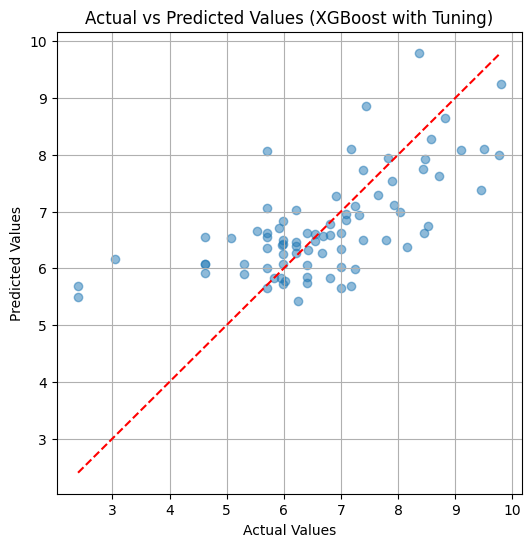

In [117]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (XGBoost with Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

## **After implementing the Optuna Optimization technique of XGboost I got:**
- Final MAE: 0.8313 ((Significant accuracy boost )
- Final RMSE: 1.1047 (Fewer large errors ). 
- Final R² Score: 0.4238 (Now explaining ~42% of the variance).

Which are the best metrics.

In [120]:
!pip install shap

  Using cached shap-0.47.0-cp310-cp310-win_amd64.whl.metadata (25 kB)
   ---------------------------------------- 530.1/530.1 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 2.8/2.8 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 30.3/30.3 MB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
!pip install lime 

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [42 lines of output]
  running egg_info
  creating C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info
  writing C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\PKG-INFO
  writing dependency_links to C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\dependency_links.txt
  writing requirements to C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\requires.txt
  writing top-level names to C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\top_level.txt
  writing manifest file 'C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\Hamish\AppData\Local\Temp\pip-pip-egg-info-t_u6enjo\lime.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  Traceb

In [122]:
import shap

# Initialize the SHAP Explainer for XGBoost
explainer = shap.Explainer(xgb_model)

# Compute SHAP values
shap_values = explainer(X_test_scaled)

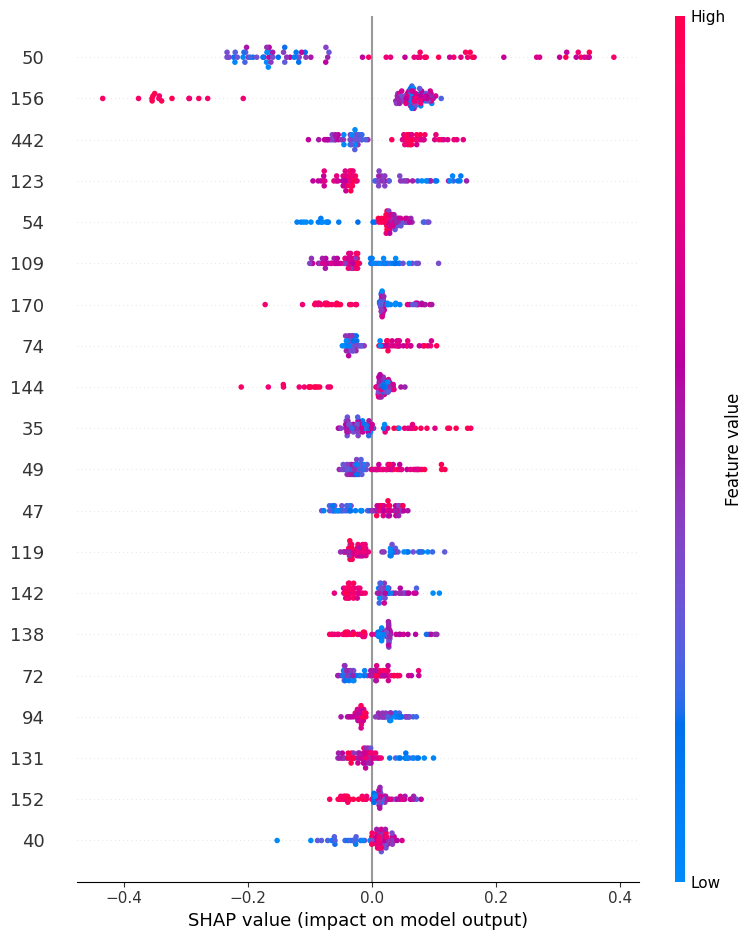

In [123]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# 4 Key Insights and Recommendations
### 4.1 Insights
- The final tuned XGBoost model achieved a significant improvement over the baseline Neural Network model.
- SHAP analysis revealed that certain spectral features had a disproportionately high impact on predictions, guiding future feature engineering efforts.
- The model effectively captured complex patterns in the data, but additional improvement may be possible through enhanced feature engineering.

### 4.2 Recommendations for Further Improvement
   - Introduce interaction features to capture non-linear relationships.
   - Implement Stacking Ensemble Methods to combine the strengths of multiple models.
   - Explore Target Encoding for categorical variables to improve feature representation.
   - Perform deeper residual analysis to detect patterns in prediction errors.

